In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Corona_NLP (2).csv',encoding='latin1')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [3]:
df.shape

(41157, 6)

In [4]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [5]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [6]:
df["Sentiment"]=df["Sentiment"].replace({"Extremely Positive":"Positive","Extremely Negative":"Negative"})

In [7]:
df['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [8]:
df['OriginalTweet'].sample(5)

24659    My question about the #CERB is: why would anyo...
31952    @ToonBoom it's funny that your site says that ...
2258     Shopping online in Switzerland :\r\r\nqueue to...
22085    Kroger swaps Cincy-area store to pickup only. ...
16354    @RealSammyMarkle @superscuba83 @BorisJohnson @...
Name: OriginalTweet, dtype: object

In [9]:
df['OriginalTweet'][3]

"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"

In [10]:
import re
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
lm=WordNetLemmatizer()
sw=stopwords.words('English')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
corpus=[]
for i in df['OriginalTweet']:
    t=i
    t=re.sub('[^A-Za-z0-9]',' ',t)   #Removing Punctuations
    t=t.lower()                      #Converting to Lower Case
    t=word_tokenize(t)               #Tokenizing the words
    t=[x for x in t if x not in sw]  #Removing Stop Words
    t=[lm.lemmatize(x) for x in t]   #lemmitization
    t=" ".join(t)
    corpus.append(t)

In [14]:
print(corpus[:10])

['menyrbie phil gahan chrisitv http co ifz9fan2pa http co xx6ghgfzcc http co i2nlzdxno8', 'advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order', 'coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid 19 outbreak http co binca9vp8p', 'food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid 19 covid19 coronavirus confinement confinementotal confinementgeneral http co zrlg0z520j', 'ready go supermarket covid19 outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement http co usmualq72n', 'news region first confirmed covid 19 case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good tim dodson report http co cfxch7

In [15]:
tf=TfidfVectorizer(max_features=1500)
tf_res=tf.fit_transform(corpus).toarray()

In [16]:
print(tf_res[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
print(type(tf_res))

<class 'numpy.ndarray'>


In [18]:
x=tf_res
y=df['Sentiment']
print(len(x))
print(y.shape)

41157
(41157,)


In [19]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25)  #Splitting the data into Train and Test data
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(30867, 1500)
(10290, 1500)
(30867,)
(10290,)


In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

### Applying Multinominal Naive Bayes Model


In [21]:
m1=MultinomialNB()
m1.fit(x_tr,y_tr)

MultinomialNB()

In [22]:
print('Training score',m1.score(x_tr,y_tr))
print('Testing score',m1.score(x_te,y_te))

Training score 0.6838047105322836
Testing score 0.6637512147716229


In [23]:
ypred_m1 = m1.predict(x_te)
print(ypred_m1)

['Negative' 'Negative' 'Positive' ... 'Positive' 'Negative' 'Negative']


In [24]:
cm_m1 = confusion_matrix(y_te,ypred_m1)
print(cm_m1)
print(classification_report(y_te,ypred_m1))  

[[2698   78 1114]
 [ 538  403 1023]
 [ 634   73 3729]]
              precision    recall  f1-score   support

    Negative       0.70      0.69      0.70      3890
     Neutral       0.73      0.21      0.32      1964
    Positive       0.64      0.84      0.72      4436

    accuracy                           0.66     10290
   macro avg       0.69      0.58      0.58     10290
weighted avg       0.68      0.66      0.64     10290



### Accuracy for Applying Multinomial Naive Bayes Model is 66%

### Applying KNN Classifier


In [25]:
m2 = KNeighborsClassifier(n_neighbors=555) 
m2.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=555)

In [26]:
print('Training score',m2.score(x_tr,y_tr))
print('Testing score',m2.score(x_te,y_te))

Training score 0.6308679171931189
Testing score 0.6284742468415938


In [27]:
ypred_m2 = m2.predict(x_te)
print(ypred_m2)

['Negative' 'Neutral' 'Positive' ... 'Positive' 'Negative' 'Negative']


In [28]:
cm_m2 = confusion_matrix(y_te,ypred_m2)
print(cm_m2)
print(classification_report(y_te,ypred_m2)) 

[[2156  302 1432]
 [ 325  711  928]
 [ 515  321 3600]]
              precision    recall  f1-score   support

    Negative       0.72      0.55      0.63      3890
     Neutral       0.53      0.36      0.43      1964
    Positive       0.60      0.81      0.69      4436

    accuracy                           0.63     10290
   macro avg       0.62      0.58      0.58     10290
weighted avg       0.63      0.63      0.62     10290



### Accuracy for Applying KNN Classifier is 63%

### Applying Decision Tree Classifier

In [29]:
m3 = DecisionTreeClassifier(criterion='gini',max_depth=6)
m3.fit(x_tr,y_tr)

DecisionTreeClassifier(max_depth=6)

In [30]:
print('Training score',m3.score(x_tr,y_tr))
print('Testing score',m3.score(x_te,y_te))

Training score 0.5120355071759485
Testing score 0.508357628765792


In [31]:
ypred_m3 = m3.predict(x_te)
print(ypred_m3)

['Negative' 'Positive' 'Positive' ... 'Positive' 'Negative' 'Positive']


In [32]:
cm_m3 = confusion_matrix(y_te,ypred_m3)
print(cm_m3)
print(classification_report(y_te,ypred_m3)) 

[[ 868  520 2502]
 [  37  797 1130]
 [ 209  661 3566]]
              precision    recall  f1-score   support

    Negative       0.78      0.22      0.35      3890
     Neutral       0.40      0.41      0.40      1964
    Positive       0.50      0.80      0.61      4436

    accuracy                           0.51     10290
   macro avg       0.56      0.48      0.45     10290
weighted avg       0.59      0.51      0.47     10290



### Accuracy for Applying Decision Tree Classifier is 51%

### Applying RandomForest Classifier

In [33]:
m4=RandomForestClassifier(n_estimators=90,criterion='entropy',max_depth=6,min_samples_split=15)
m4.fit(x_tr,y_tr)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=15,
                       n_estimators=90)

In [34]:
print('Training score',m4.score(x_tr,y_tr))
print('Testing score',m4.score(x_te,y_te))

Training score 0.5377911685618946
Testing score 0.5256559766763849


In [35]:
ypred_m4 = m4.predict(x_te)
print(ypred_m4)

['Negative' 'Positive' 'Positive' ... 'Positive' 'Negative' 'Negative']


In [36]:
cm_m4 = confusion_matrix(y_te,ypred_m4)
print(cm_m4)
print(classification_report(y_te,ypred_m4,zero_division=0)) 

[[1113    0 2777]
 [  42    0 1922]
 [ 140    0 4296]]
              precision    recall  f1-score   support

    Negative       0.86      0.29      0.43      3890
     Neutral       0.00      0.00      0.00      1964
    Positive       0.48      0.97      0.64      4436

    accuracy                           0.53     10290
   macro avg       0.45      0.42      0.36     10290
weighted avg       0.53      0.53      0.44     10290



### Accuracy for Applying RandomForest Classifier is 53%

### Applying Gaussian Naive Bayes Model

In [37]:
m5 = GaussianNB()
m5.fit(x_tr,y_tr)

GaussianNB()

In [38]:
print('Training score',m5.score(x_tr,y_tr))
print('Testing score',m5.score(x_te,y_te))

Training score 0.6188162114879969
Testing score 0.5906705539358601


In [39]:
ypred_m5 = m5.predict(x_te)
print(ypred_m5)

['Negative' 'Negative' 'Positive' ... 'Neutral' 'Negative' 'Negative']


In [40]:
cm_m5 = confusion_matrix(y_te,ypred_m5)
print(cm_m5)
print(classification_report(y_te,ypred_m5))

[[2068 1245  577]
 [ 180 1591  193]
 [ 656 1361 2419]]
              precision    recall  f1-score   support

    Negative       0.71      0.53      0.61      3890
     Neutral       0.38      0.81      0.52      1964
    Positive       0.76      0.55      0.63      4436

    accuracy                           0.59     10290
   macro avg       0.62      0.63      0.59     10290
weighted avg       0.67      0.59      0.60     10290



### Accuracy for Applying Gaussian Naive Bayes Model is 59%

### Applying Logistic Regression

In [41]:
m6 = LogisticRegression(solver='liblinear')
m6.fit(x_tr,y_tr)

LogisticRegression(solver='liblinear')

In [42]:
print('Training score',m6.score(x_tr,y_tr))
print('Testing score',m6.score(x_te,y_te))

Training score 0.7877992678264814
Testing score 0.752575315840622


In [43]:
ypred_m6 = m6.predict(x_te)
print(ypred_m6)

['Negative' 'Negative' 'Positive' ... 'Negative' 'Negative' 'Negative']


In [44]:
cm_m6 = confusion_matrix(y_te,ypred_m6)
print(cm_m6)
print(classification_report(y_te,ypred_m6))

[[2958  250  682]
 [ 416 1129  419]
 [ 565  214 3657]]
              precision    recall  f1-score   support

    Negative       0.75      0.76      0.76      3890
     Neutral       0.71      0.57      0.63      1964
    Positive       0.77      0.82      0.80      4436

    accuracy                           0.75     10290
   macro avg       0.74      0.72      0.73     10290
weighted avg       0.75      0.75      0.75     10290



### Accuracy for Applying Logistic Regression Model is 75%

In [45]:
res = {'MultinomialNB':m1.score(x_te,y_te),'KNN':m2.score(x_te,y_te),'DecTree':m3.score(x_te,y_te),'Random':m4.score(x_te,y_te),'GausNB':m5.score(x_te,y_te),'Logistic':m6.score(x_te,y_te)}
print(res)

{'MultinomialNB': 0.6637512147716229, 'KNN': 0.6284742468415938, 'DecTree': 0.508357628765792, 'Random': 0.5256559766763849, 'GausNB': 0.5906705539358601, 'Logistic': 0.752575315840622}


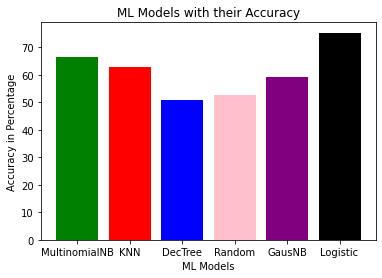

In [46]:
plt.bar(res.keys(),[i*100 for i in res.values()],color=['green','red','blue','pink','purple','black'])
plt.xlabel('ML Models')
plt.ylabel('Accuracy in Percentage')
plt.title('ML Models with their Accuracy')
plt.show()

#### Report : Out of all the Machine Learning  Models, It is reported that Logistic Regression Model generates the highest accuracy which is 75%